In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/Data Science/Data/Divar/divar.csv")

C:\Users\b-jafari.ZARMACARON\AppData\Local\Temp\3\ipykernel_32816\1122002598.py:1: DtypeWarning: Columns (10,26,28,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\b-jafari.ZARMACARON\Notebooks\divar.csv")


In [ ]:
df= df[df['cat3_slug']=='apartment-sell']

In [15]:
pd.set_option('display.max_columns', 70)
pd.set_option('display.float_format',"{:.2f}".format)

In [ ]:
df=df.dropna(axis=1,how = 'all')

In [ ]:
df.drop(columns = ['has_water','has_electricity','has_gas','has_security_guard'\
                   ,'has_barbecue','has_pool','has_jacuzzi','has_sauna',\
                   'cat2_slug','cat3_slug','location_radius','description',\
                   'location_latitude','location_longitude','title','price_mode'],inplace=True)

In [ ]:
df['created_at_month'] = pd.to_datetime( df['created_at_month'] )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303385 entries, 1 to 999995
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   city_slug                303385 non-null  object        
 1   neighborhood_slug        167946 non-null  object        
 2   created_at_month         303385 non-null  datetime64[ns]
 3   user_type                110664 non-null  object        
 4   price_value              303380 non-null  float64       
 5   building_size            303380 non-null  float64       
 6   deed_type                185942 non-null  object        
 7   floor                    303377 non-null  object        
 8   rooms_count              303379 non-null  object        
 9   total_floors_count       187079 non-null  object        
 10  unit_per_floor           184924 non-null  object        
 11  has_balcony              194589 non-null  object        
 12  has_elevator    

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_value,303380.00,15496112270.72,497841140409.86,0.00,1870000000.00,3300000000.00,6300000000.00,99999999999999.00
building_size,303380.00,499.04,45145.29,1.00,72.00,90.00,120.00,10000000.00


In [ ]:
df.head(5)

,city_slug,neighborhood_slug,created_at_month,user_type,price_value,building_size,deed_type,floor,rooms_count,total_floors_count,unit_per_floor,has_balcony,has_elevator,has_warehouse,has_parking,construction_year,is_rebuilt,has_warm_water_provider,has_heating_system,has_cooling_system,has_restroom,building_direction,floor_material
1,tehran,gholhak,2024-05-01,مشاور املاک,8500000000.00,60.00,NaN,3,یک,NaN,NaN,NaN,True,True,True,۱۳۸۴,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mashhad,emamreza,2024-05-01,مشاور املاک,5750000000.00,115.00,single_page,4,دو,6,NaN,true,True,True,True,۱۴۰۳,NaN,package,shoofaj,air_conditioner,squat_seat,north,ceramic
7,tehran,dardasht,2024-09-01,مشاور املاک,8700000000.00,100.00,NaN,4,دو,NaN,NaN,NaN,True,True,True,۱۳۹۳,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,mahdasht-city,NaN,2024-06-01,مشاور املاک,650000000.00,78.00,single_page,4,دو,6,4,true,True,True,True,۱۳۹۶,True,package,shoofaj,water_cooler,squat,north,ceramic
9,mashhad,faramarzabbasi,2024-10-01,NaN,3000000000.00,80.00,NaN,3,دو,NaN,NaN,true,False,False,True,۱۳۸۷,False,NaN,NaN,NaN,squat,NaN,ceramic


In [ ]:
df.rooms_count.unique()

array(['یک', 'دو', 'سه', 'چهار', 'پنج یا بیشتر', 'بدون اتاق', nan],
      dtype=object)

In [ ]:
replace_dict = {
    'یک': 1,
    'دو': 2,
    'سه': 3,
    'چهار':4,
    'پنج یا بیشتر':5,
    'بدون اتاق':0
}


In [ ]:
df['rooms_count'] = df['rooms_count'].replace(replace_dict)

In [ ]:
df.construction_year.unique()

array(['۱۳۸۴', '۱۴۰۳', '۱۳۹۳', '۱۳۹۶', '۱۳۸۷', '۱۴۰۲', '۱۳۹۸', '۱۴۰۰',
       '۱۳۹۲', '۱۴۰۱', '۱۳۹۴', '۱۳۸۳', '۱۳۹۹', '۱۳۸۵', '۱۳۸۸', '۱۳۸۲',
       '۱۳۹۵', '۱۳۹۱', '۱۳۹۰', '۱۳۸۶', '۱۳۹۷', '۱۳۸۹', '۱۳۷۹', '۱۳۸۱',
       '۱۳۸۰', '۱۳۷۱', 'قبل از ۱۳۷۰', '۱۳۷۸', '۱۳۷۵', '۱۳۷۶', '۱۳۷۷',
       '۱۳۷۲', '۱۳۷۳', '۱۳۷۴', nan], dtype=object)

In [ ]:
replace_dict1 = {
    '۱۳۸۴': '1384',
    '۱۴۰۳': '1403',
    '۱۳۹۳': '1393',
    '۱۳۹۶': '1396',
    '۱۳۸۷': '1387',
    '۱۴۰۲': '1402',
    '۱۳۹۸': '1398',
    '۱۴۰۰': '1400',
    '۱۳۹۲': '1392',
    '۱۴۰۱': '1401',
    '۱۳۹۴': '1394',
    '۱۳۸۳': '1383',
    '۱۳۹۹': '1399',
    '۱۳۸۵': '1385',
    '۱۳۸۸': '1388',
    '۱۳۸۲': '1382',
    '۱۳۹۵': '1395',
    '۱۳۹۱': '1391',
    '۱۳۹۰': '1390',
    '۱۳۸۶': '1386',
    '۱۳۹۷': '1397',
    '۱۳۸۹': '1389',
    '۱۳۷۹': '1379',
    '۱۳۸۱': '1381',
    '۱۳۸۰': '1380',
    '۱۳۷۱': '1371',
    'قبل از ۱۳۷۰': '1370',
    '۱۳۷۸': '1378',
    '۱۳۷۵': '1375',
    '۱۳۷۶': '1376',
    '۱۳۷۷': '1377',
    '۱۳۷۲': '1372',
    '۱۳۷۳': '1373',
    '۱۳۷۴': '1374'
}


In [ ]:
df['construction_year'] = df['construction_year'].replace(replace_dict1)

In [ ]:
df.has_balcony.unique()

array([nan, 'true', 'false', 'unselect', True, False], dtype=object)

In [ ]:
replace_dict2 = {
    'true': True,
    'false': False,
    'unselect': np.nan,
}


In [ ]:
df['has_balcony'] = df['has_balcony'].replace(replace_dict2)

In [ ]:
def clean_unselect_and_bools(df):
    replace_map = {'unselect': np.nan}
    for col in df.columns:
        df[col] = df[col].replace(replace_map)
    return df

In [ ]:
df = clean_unselect_and_bools(df)

In [ ]:
df.user_type.unique()

array(['مشاور املاک', nan, 'شخصی'], dtype=object)

In [ ]:
replace_dict4 = {
    'مشاور املاک': 'real_estate_agency',
    'شخصی': 'individual',
    np.nan: np.nan  # نال رو دست نمی‌زنیم
}


In [ ]:
df['user_type'] = df['user_type'].replace(replace_dict4)

In [ ]:
for col in df.columns:
    percent_null = df[col].isnull().mean()*100
    print(f"{col:<30} {percent_null:6.6f}% null")


city_slug                      0.000000% null
neighborhood_slug              44.642616% null
created_at_month               0.000000% null
user_type                      63.523576% null
price_value                    0.001648% null
building_size                  0.001648% null
deed_type                      38.838110% null
floor                          0.002637% null
rooms_count                    0.001978% null
total_floors_count             38.359181% null
unit_per_floor                 39.095539% null
has_balcony                    35.894985% null
has_elevator                   0.002307% null
has_warehouse                  0.002307% null
has_parking                    0.001978% null
construction_year              0.001648% null
is_rebuilt                     25.886250% null
has_warm_water_provider        41.691910% null
has_heating_system             42.643506% null
has_cooling_system             45.706610% null
has_restroom                   37.812351% null
building_direction     

In [ ]:
rows_before = len(df)

cols_to_clean = []

for col in df.columns:
    percent_null = df[col].isnull().mean() * 100
    if 0 < percent_null < 1:
        cols_to_clean.append(col)

print(f"ستون‌هایی که بین ۰ و ۱٪ نال دارند: {cols_to_clean}")

df = df.dropna(subset=cols_to_clean)

rows_after = len(df)

rows_removed = rows_before - rows_after

print(f"\nتعداد ردیف‌های حذف شده: {rows_removed}")
print(f"تعداد ردیف‌های باقی مانده: {rows_after}")



ستون‌هایی که بین ۰ و ۱٪ نال دارند: ['price_value', 'building_size', 'floor', 'rooms_count', 'has_elevator', 'has_warehouse', 'has_parking', 'construction_year']

تعداد ردیف‌های حذف شده: 10
تعداد ردیف‌های باقی مانده: 303375


In [ ]:
df['floor'] = df['floor'].replace('30+', '30')

In [ ]:
df['total_floors_count'] = df['total_floors_count'].replace('30+', '30')

In [ ]:
df['total_floors_count'].isna().sum()

116366

In [ ]:
df['floor'] = df['floor'].astype('int')

In [ ]:
df['total_floors_count'] = pd.to_numeric(df['total_floors_count'], errors='coerce')

In [ ]:
df.loc[df['total_floors_count'] < df['floor'], 'total_floors_count'] = np.nan

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(df[['floor', 'total_floors_count']])

In [ ]:
mask = df['total_floors_count'].isna()
df.loc[mask, 'total_floors_count'] = imputed[:, 1][mask]

In [ ]:
df['construction_year'] = df['construction_year'].astype('int')


In [ ]:
df['total_floors_count'] = df['total_floors_count'].astype('int')

In [ ]:
df.to_csv(r"Divar2")

In [42]:
df = pd.read_csv(r"/content/drive/MyDrive/Data Science/Data/Divar/Divar2.csv")
df.drop(columns =["Unnamed: 0","neighborhood_slug"],axis=1,inplace=True)
df['created_at_month'] = pd.to_datetime( df['created_at_month'] )

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303375 entries, 0 to 303374
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   city_slug                303375 non-null  object        
 1   created_at_month         303375 non-null  datetime64[ns]
 2   user_type                110659 non-null  object        
 3   price_value              303375 non-null  float64       
 4   building_size            303375 non-null  float64       
 5   deed_type                185555 non-null  object        
 6   floor                    303375 non-null  int64         
 7   rooms_count              303375 non-null  float64       
 8   total_floors_count       303375 non-null  int64         
 9   unit_per_floor           184775 non-null  object        
 10  has_balcony              194485 non-null  object        
 11  has_elevator             303375 non-null  bool          
 12  has_warehouse   

In [44]:
def clean_null(df):
    object_cols = df.select_dtypes(include='object').columns
    replace_map = { np.nan : 'missing'}
    for col in object_cols:
        df[col] = df[col].replace(replace_map)
    return df

In [45]:
df=clean_null(df)

In [46]:
df.deed_type.unique()

array(['missing', 'single_page', 'other', 'written_agreement',
       'multi_page'], dtype=object)

In [47]:
categorical_columns = [column for column in df.columns if df[column].dtypes == 'object']
categorical_columns = [col for col in categorical_columns if col not in ['city_slug']]
categorical_columns = [col for col in df.columns if df[col].nunique() < 20 and df[col].dtype in ['object', 'bool', 'int64']]
df[categorical_columns] = df[categorical_columns].astype('category')

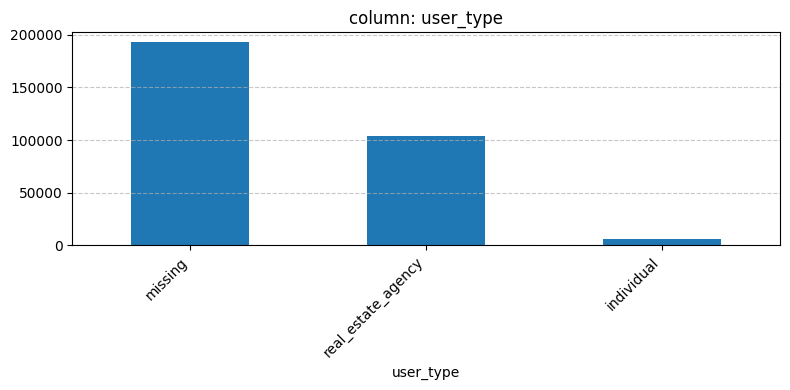

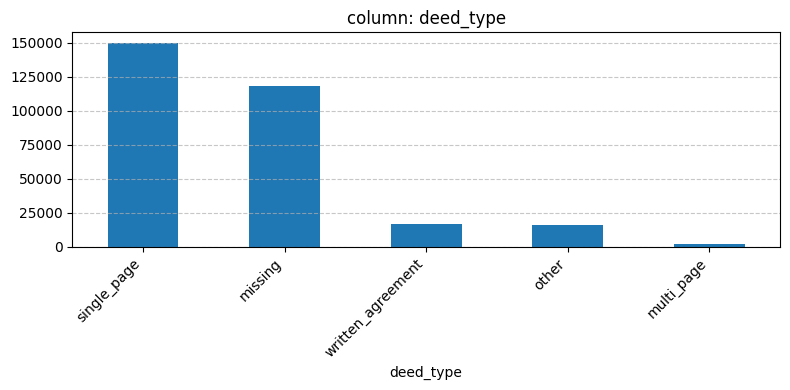

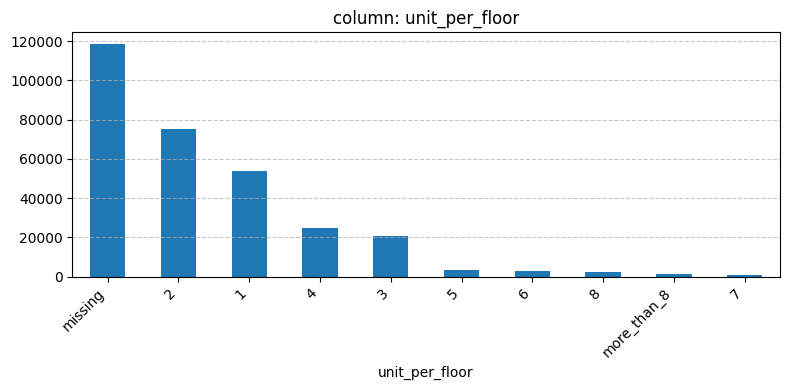

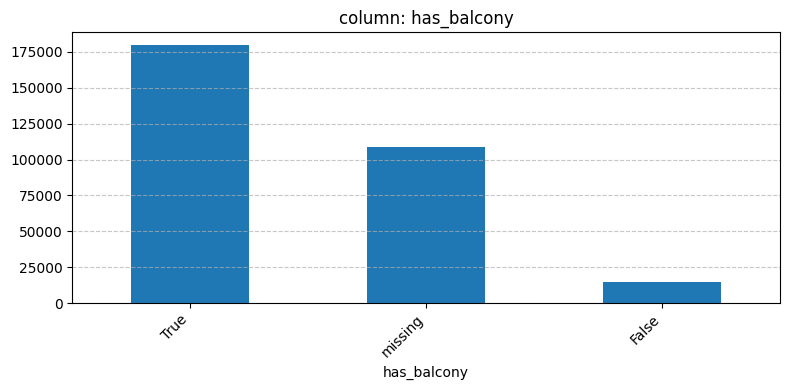

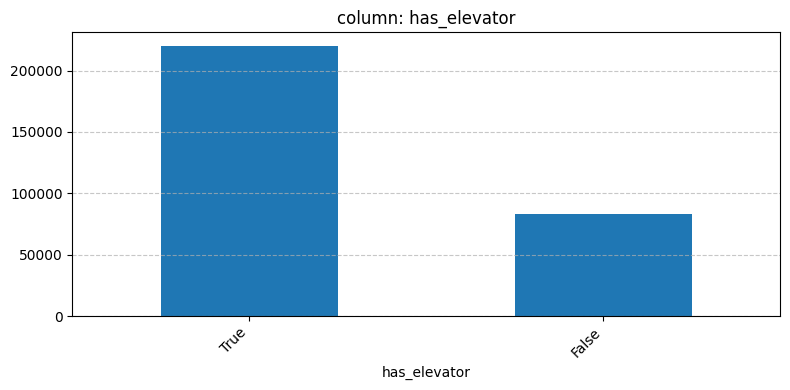

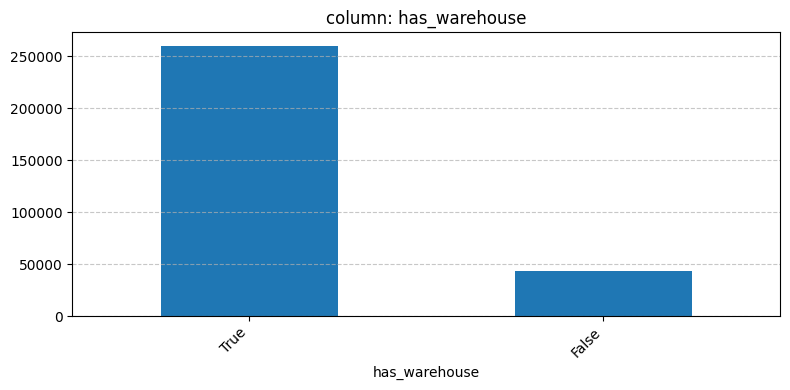

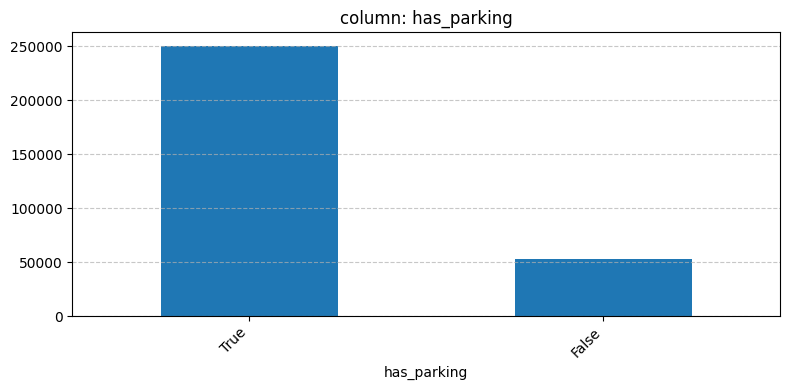

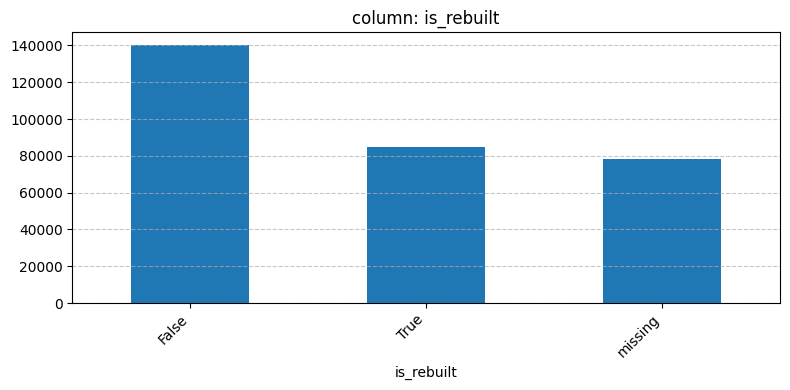

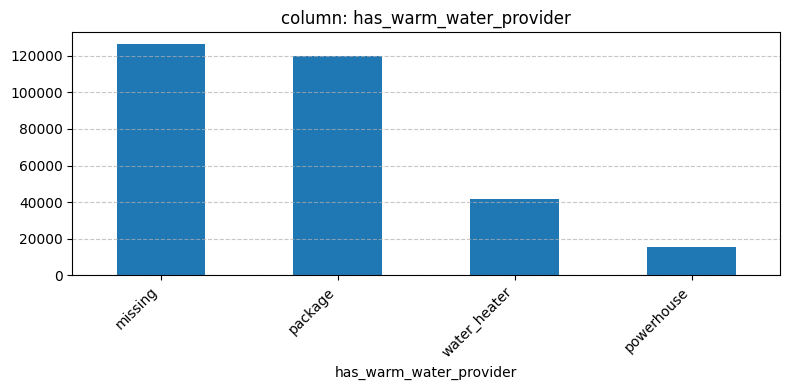

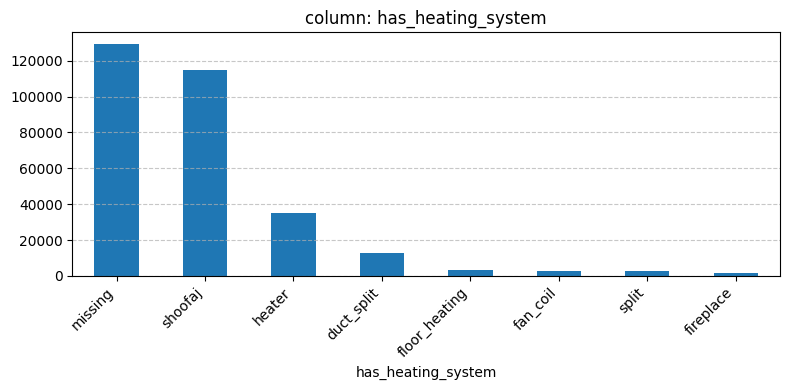

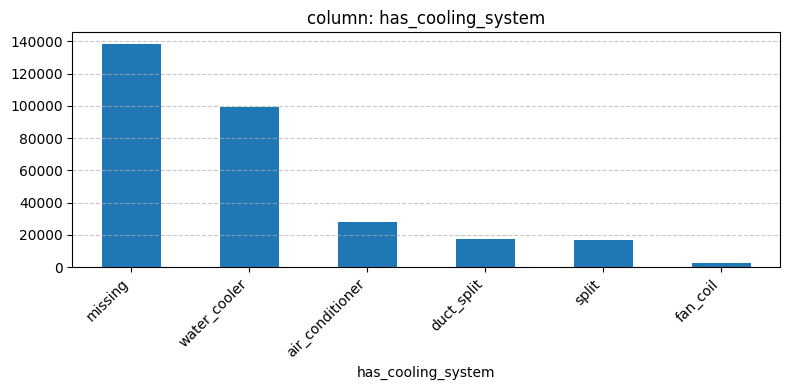

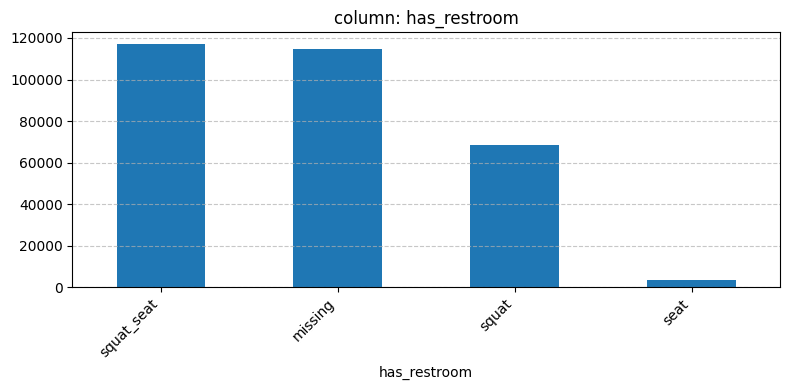

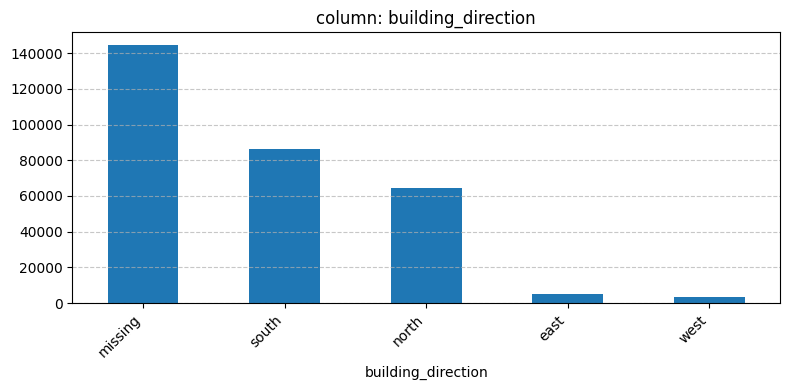

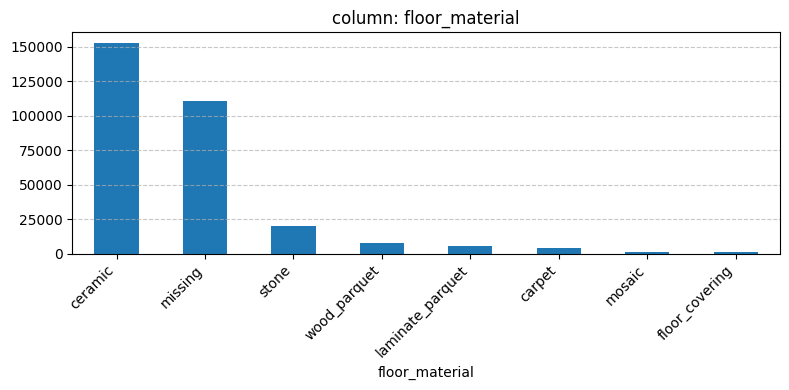

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# فرض: df دیتافریم تو هست

# انتخاب ستون‌های متنی
object_cols = df.select_dtypes(include='category').columns

# حلقه روی هر ستون
for col in object_cols:
    # شمارش مقدارهای یکتا (با در نظر گرفتن NaN)
    counts = df[col].value_counts(dropna=False)

    # رسم نمودار
    plt.figure(figsize=(8, 4))
    counts.plot(kind='bar')
    plt.title(f'column: {col}')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [49]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = [col for col in df.columns if df[col].dtype.name in ['object', 'category']]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))


In [50]:
categorical_cols

['city_slug',
 'user_type',
 'deed_type',
 'unit_per_floor',
 'has_balcony',
 'has_elevator',
 'has_warehouse',
 'has_parking',
 'is_rebuilt',
 'has_warm_water_provider',
 'has_heating_system',
 'has_cooling_system',
 'has_restroom',
 'building_direction',
 'floor_material']

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303375 entries, 0 to 303374
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   city_slug                303375 non-null  int64         
 1   created_at_month         303375 non-null  datetime64[ns]
 2   user_type                303375 non-null  int64         
 3   price_value              303375 non-null  float64       
 4   building_size            303375 non-null  float64       
 5   deed_type                303375 non-null  int64         
 6   floor                    303375 non-null  int64         
 7   rooms_count              303375 non-null  float64       
 8   total_floors_count       303375 non-null  int64         
 9   unit_per_floor           303375 non-null  int64         
 10  has_balcony              303375 non-null  int64         
 11  has_elevator             303375 non-null  int64         
 12  has_warehouse   

In [52]:
def is_repeated_number(x):
    s = str(int(x))
    return len(set(s)) == 1

df=df[~df['price_value'].apply(lambda x: is_repeated_number(x))]


In [53]:
df['price_value_log'] = np.log1p(df['price_value'])

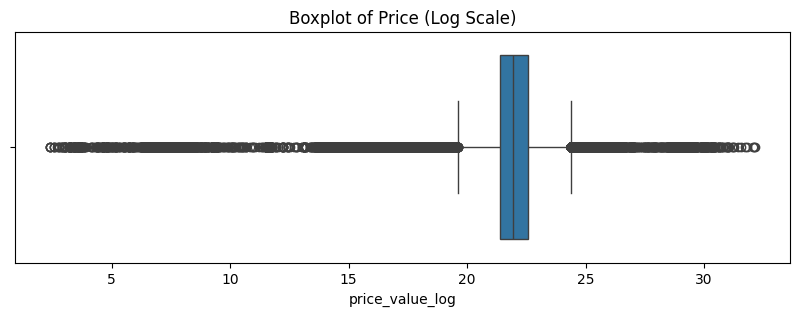

In [54]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df['price_value_log'])
plt.title('Boxplot of Price (Log Scale)')
plt.show()

In [55]:
df.drop('price_value',axis=1,inplace=True)

In [56]:
def DateChanges(data):
    data['Year'] = data['created_at_month'].dt.year
    data['month']= data['created_at_month'].dt.month

    min_year = data['Year'].min()
    max_year = data['Year'].max()

    data['Year_sin'] = np.sin(2 * np.pi * (data['Year'] - min_year) / (max_year - min_year))
    data['Year_cos'] = np.cos(2 * np.pi * (data['Year'] - min_year) / (max_year - min_year))

    data['Month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
    data['Month_cos'] = np.cos(2 * np.pi * data['month'] / 12)



In [57]:
DateChanges(df)

In [58]:
df.drop('created_at_month',axis=1,inplace=True)

In [59]:
df

,city_slug,user_type,building_size,deed_type,floor,rooms_count,total_floors_count,unit_per_floor,has_balcony,has_elevator,has_warehouse,has_parking,construction_year,is_rebuilt,has_warm_water_provider,has_heating_system,has_cooling_system,has_restroom,building_direction,floor_material,price_value_log,Year,month,Year_sin,Year_cos,Month_sin,Month_cos
0,360,2,60.00,0,3,1.00,6,8,2,1,1,1,1384,2,0,5,3,0,1,4,22.86,2024,5,-1.00,-0.00,0.50,-0.87
1,226,2,115.00,3,4,2.00,6,8,1,1,1,1,1403,2,1,6,0,3,2,1,22.47,2024,5,-1.00,-0.00,0.50,-0.87
2,360,2,100.00,0,4,2.00,6,8,2,1,1,1,1393,2,0,5,3,0,1,4,22.89,2024,9,-1.00,-0.00,-1.00,-0.00
3,213,2,78.00,3,4,2.00,6,3,1,1,1,1,1396,1,1,6,5,2,2,1,20.29,2024,6,-1.00,-0.00,0.00,-1.00
4,226,1,80.00,0,3,2.00,6,8,1,0,0,1,1387,0,0,5,3,2,1,1,21.82,2024,10,-1.00,-0.00,-0.87,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303370,300,1,175.00,3,5,3.00,7,0,1,1,1,1,1403,0,1,6,5,2,0,1,21.87,2024,8,-1.00,-0.00,-0.87,-0.50
303371,368,2,140.00,0,1,2.00,4,8,2,1,1,1,1401,2,0,5,3,0,1,4,22.11,2024,9,-1.00,-0.00,-1.00,-0.00
303372,360,1,91.00,3,4,2.00,4,1,0,0,1,1,1388,1,3,4,5,2,2,7,22.00,2024,12,-1.00,-0.00,-0.00,1.00
303373,101,1,105.00,3,2,2.00,5,1,1,1,1,1,1401,0,1,6,0,3,3,1,22.19,2024,11,-1.00,-0.00,-0.50,0.87


In [60]:
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error


X = df.drop(['price_value_log'], axis=1)
y = df['price_value_log']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_initial = lgb.LGBMRegressor(objective='regression', random_state=42)
model_initial.fit(X_train, y_train)

y_pred_initial = model_initial.predict(X_test)
rmsle_initial = np.sqrt(mean_squared_log_error(y_test, y_pred_initial))
print(f" RMSLE مدل اولیه: {rmsle_initial:.5f}")


feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_initial.feature_importances_
})
feature_importances['importance_ratio'] = feature_importances['importance'] / feature_importances['importance'].sum()

important_features = feature_importances[feature_importances['importance_ratio'] >= 0.01]['feature'].tolist()

print(f"تعداد فیچرهای انتخاب شده: {len(important_features)}")

X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

model_selected = lgb.LGBMRegressor(objective='regression', random_state=42)
model_selected.fit(X_train_selected, y_train)


y_pred_selected = model_selected.predict(X_test_selected)
rmsle_selected = np.sqrt(mean_squared_log_error(y_test, y_pred_selected))
print(f"🟢 RMSLE مدل بعد از حذف فیچرهای کم اهمیت: {rmsle_selected:.5f}")

improvement = (rmsle_initial - rmsle_selected) * 100 / rmsle_initial
print(f" بهبود RMSLE: {improvement:.2f}%")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 634
[LightGBM] [Info] Number of data points in the train set: 238485, number of used features: 26
[LightGBM] [Info] Start training from score 21.949822
 RMSLE مدل اولیه: 0.06818
تعداد فیچرهای انتخاب شده: 21
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 614
[LightGBM] [Info] Number of data points in the train set: 238485, number of used features: 21
[LightGBM] [Info] Start training from score 21.949822
🟢 RMSLE مدل بعد از حذف فیچرهای کم اهمیت: 0.06820
 بهبود RMSLE: -0.04%


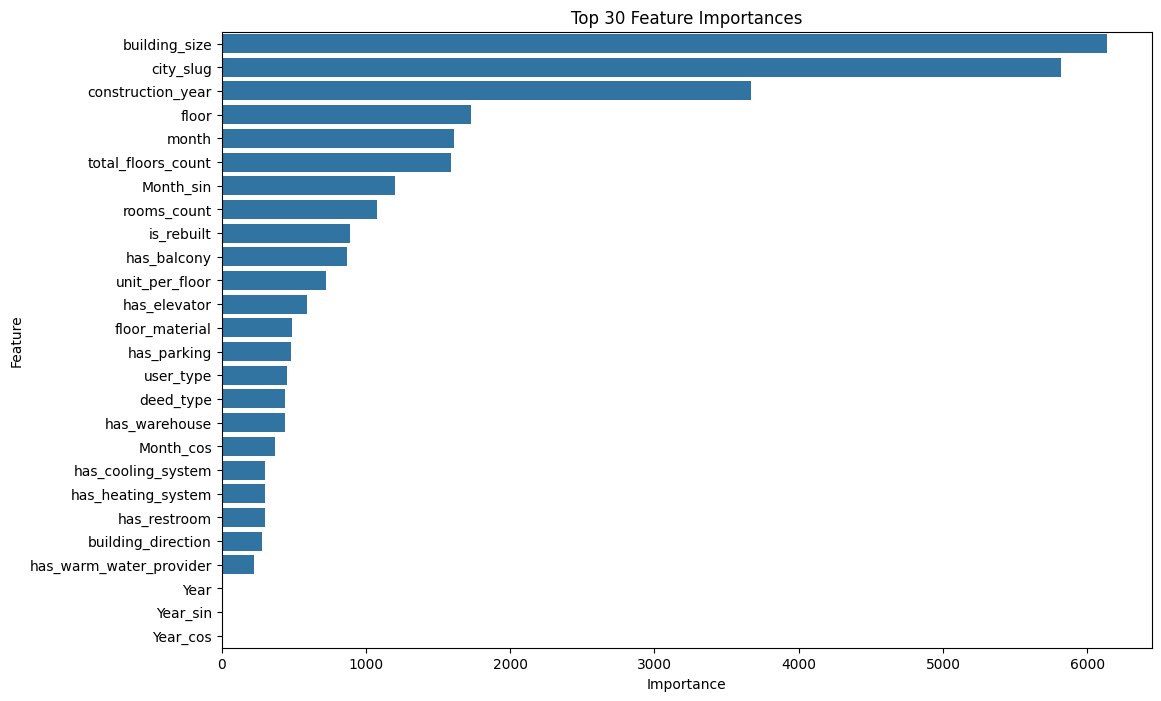

In [61]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(30))
plt.title('Top 30 Feature Importances')
plt.show()